<a href="https://www.kaggle.com/code/dtrade84/big-data-derby-analysis?scriptVersionId=104349785" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

![Big Data Derby Logo][1]

[1]: https://storage.googleapis.com/kaggle-competitions/kaggle/37644/logos/header.png?t=2022-08-05-15-26-16


# Big Data Derby #

***

Analyze horse racing data to improve the health of the horse and strategy of competition on [Kaggle](https://www.kaggle.com/competitions/big-data-derby-2022/overview)


# Table Of Contents #

***
1. [Introduction](#intro)

   * [Dataset Description](#description)
   
       * [Column ID's](#colid)
      
    
   * [Objective](#objective)
   
   * [Importing Libraries](#import)  
   
2. [Reading in the Data](#readdata)

    * [Viewing the Dataset](#viewdata)
    
    * [Cleaning the Dataset](#cleandata)
    
3. [Exploratory Data Analysis](#eda)

    * [Plotting the Data](#plotdata)
    
4. [Equine Safety Analysis](#eqa)


<a id='intro'></a>
# Introduction #
***

<a id='description'></a>
## Dataset description ##

The dataset's provided by NYTHA/NYRA which inludes, but not limited to: tracks races took place, race date, weight carried, jockey, odds, course type, course condition, etc.

Another dataset with all the dataset's combined is also provided.

<a id='colid'></a>
### Column ID's ###

* track_id - 3 character id for the track the race took place at. AQU -Aqueduct, BEL - Belmont, SAR - Saratoga.
* race_date - date the race took place. YYYY-MM-DD.
* race_number - Number of the race. Passed as 3 characters but can be cast or converted to int for this data set.
* program_number - Program number of the horse in the race passed as 3 characters. Should remain 3 characters as it isn't limited to just numbers. Is essentially the unique identifier of the horse in the race.
* trakus_index - The common collection of point of the lat / long of the horse in the race passed as an integer. From what we can tell, it's collected every 0.25 seconds.
* latitude - The latitude of the horse in the race passed as a float.
* longitude - The longitude of the horse in the race passed as a float.
* distance_id - Distance of the race in furlongs passed as an integer. Example - 600 would be 6 furlongs.
* course_type - The course the race was run over passed as one character. M - Hurdle, D - Dirt, O - Outer turf, I - Inner turf, T - turf.
* track_condition - The condition of the course the race was run on passed as three characters. YL - Yielding, FM - Firm, SY - Sloppy, GD - Good, FT - Fast, MY - Muddy, SF - Soft.
* run_up_distance - Distance in feet of the gate to the start of the race passed as an integer.
* race_type - The classification of the race passed as as five characters. STK - Stakes, WCL - Waiver Claiming, WMC - Waiver Maiden Claiming, SST - Starter Stakes, SHP - Starter Handicap, CLM - Claiming, STR - Starter Allowance, AOC - Allowance Optionl Claimer, SOC - Starter Optional Claimer, MCL - Maiden Claiming, ALW - Allowance, MSW - Maiden Special Weight.
* purse - Purse in US dollars of the race passed as an money with two decimal places.
* post_time - Time of day the race began passed as 5 character. Example - 01220 would be 12:20.
* weight_carried - An integer of the weight carried by the horse in the race.
* jockey - Name of the jockey on the horse in the race. 50 character max.
* odds - Odds to win the race passed as an integer. Divide by 100 to derive the odds to 1. Example - 1280 would be 12.8-1.

<a id='objective'></a>
## Objective ###

The objective of the dataset is to analyze horse racing tactics, drafting strategies, and path efficiency to find solutions to equine safety 

We will do this by cleaning the dataset, and performig EDA through building statistical models and visualizations.



<a id='import'></a>


## Importing Libraries ##

Fist we will import the libraries needed to perform these functions.

We will be importing Pandas for processing the dataset,Numpy and Stastmodels for mathematical and statistical computations, and Matplotlib and Seaborn for data visualization. 

After importing the libraries we will move onto reading in the dataset.

In [1]:
# Importing libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import time
%matplotlib inline
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/big-data-derby-2022/nyra_tracking_table.csv
/kaggle/input/big-data-derby-2022/nyra_start_table.csv
/kaggle/input/big-data-derby-2022/nyra_race_table.csv
/kaggle/input/big-data-derby-2022/nyra_2019_complete.csv


<a id='readdata'></a>
# Reading in the Data #

***

Now I will read in the dataset using Pandas read_csv() function.

I will only be using the complete.csv for this analysis, for it has all the dataset's combined.

In [2]:
# Reading in the dataset using read_csv()

df = pd.read_csv('../input/big-data-derby-2022/nyra_2019_complete.csv', low_memory=False)

# Printing the first 5 rows of the dataset.

df.head()

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds
0,AQU,2019-01-01,9,6,72,40.672902,-73.827607,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090
1,AQU,2019-01-01,9,6,73,40.672946,-73.827587,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090
2,AQU,2019-01-01,9,6,74,40.672990,-73.827568,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090
3,AQU,2019-01-01,9,6,63,40.672510,-73.827781,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090
4,AQU,2019-01-01,9,6,64,40.672553,-73.827762,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090


<a id='viewdata'></a>
## Viewing the Dataset ##

Now I will be viewing parts of the dataset such as how many rows and columns there is, as wel las some basic statistics about the dataset.


In [3]:
# I will now use the shape function to view how many rows, and columns there are, respectively.

df.shape

(5228430, 17)

As we can see there are 5,228,430 rows of data and 17 columns.

Next, I will look at some statistics about the datset. Such as, the mean for each column, and unique items ine each column. I will do this by using the describe function.



In [4]:
# Using the describe function for some basic statistics.

df.describe(include='all')

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds
count,5228430,5228430,5.228430e+06,5228430,5.228430e+06,5.228430e+06,5.228430e+06,5.228430e+06,5228430,5228430,5.228430e+06,5228430,5.228430e+06,5.228430e+06,5.228430e+06,5228430,5.228430e+06
unique,3,217,NaN,20,NaN,NaN,NaN,NaN,5,7,NaN,12,NaN,NaN,NaN,178,NaN
top,AQU,2019-08-24,NaN,4,NaN,NaN,NaN,NaN,D,FT,NaN,CLM,NaN,NaN,NaN,Manuel Franco,NaN
freq,2158369,43925,NaN,611396,NaN,NaN,NaN,NaN,3229234,2345748,NaN,1142801,NaN,NaN,NaN,444024,NaN
mean,NaN,NaN,5.505409e+00,NaN,1.838652e+02,4.120387e+01,-7.377702e+01,7.563151e+02,NaN,NaN,6.791919e+01,NaN,8.887891e+04,4.204248e+02,1.207133e+02,NaN,1.482920e+03
std,NaN,NaN,2.860656e+00,NaN,1.183327e+02,9.771227e-01,4.711054e-02,1.796887e+02,NaN,NaN,3.892271e+01,NaN,1.278240e+05,2.802545e+02,4.351881e+00,NaN,1.952415e+03
min,NaN,NaN,1.000000e+00,NaN,1.000000e+00,4.066671e+01,-7.383260e+01,4.500000e+02,NaN,NaN,0.000000e+00,NaN,1.600000e+04,1.000000e+02,1.100000e+02,NaN,0.000000e+00
25%,NaN,NaN,3.000000e+00,NaN,8.800000e+01,4.067346e+01,-7.382883e+01,6.000000e+02,NaN,NaN,4.500000e+01,NaN,4.100000e+04,2.330000e+02,1.180000e+02,NaN,3.350000e+02
50%,NaN,NaN,6.000000e+00,NaN,1.760000e+02,4.071393e+01,-7.376915e+01,8.000000e+02,NaN,NaN,5.400000e+01,NaN,6.200000e+04,3.490000e+02,1.200000e+02,NaN,7.300000e+02
75%,NaN,NaN,8.000000e+00,NaN,2.640000e+02,4.071739e+01,-7.372564e+01,8.500000e+02,NaN,NaN,8.000000e+01,NaN,8.000000e+04,5.160000e+02,1.220000e+02,NaN,1.740000e+03


I also want to see if there are any columns with missing or duplicated data, and decide on which columns I will be using for my analysis. I will acheive this by using the info function.

In [5]:
# Here the info function is uded to print out the columns, and specific information such as; 
# column name, the data type for each column, and whether or not there are any null values

df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5228430 entries, 0 to 5228429
Data columns (total 17 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   track_id         5228430 non-null  object 
 1   race_date        5228430 non-null  object 
 2   race_number      5228430 non-null  int64  
 3   program_number   5228430 non-null  object 
 4   trakus_index     5228430 non-null  int64  
 5   latitude         5228430 non-null  float64
 6   longitude        5228430 non-null  float64
 7   distance_id      5228430 non-null  int64  
 8   course_type      5228430 non-null  object 
 9   track_condition  5228430 non-null  object 
 10  run_up_distance  5228430 non-null  int64  
 11  race_type        5228430 non-null  object 
 12  purse            5228430 non-null  int64  
 13  post_time        5228430 non-null  int64  
 14  weight_carried   5228430 non-null  int64  
 15  jockey           5228430 non-null  object 
 16  odds             5

Looks like ther are no non-null values in the dataset. So, I will not need to alter any of the values in the dataset.

Next, I wll check for any duplicate data in the dataset.

I will do this by using the duplicated() function.

In [6]:
## Here I check for duplicates

sum(df.duplicated())

0

Look like there are no duplicated values in the dataset.

Onto cleaning the dataset.

<a id='cleandata'></a>
## Cleaning the Dataset ##


Although I do have a clean dataset there is one thing I do want to clean up.

It seems as thoug all the numerical values are in scientific notation.

I will be removing the scientific notation from these values to make it easier for the audience to read.

In [7]:
## Here is how I changed the scientific notation to float with 2 decimal points using the options function.

pd.options.display.float_format = '{:.2f}'.format

df.head()

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds
0,AQU,2019-01-01,9,6,72,40.67,-73.83,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090
1,AQU,2019-01-01,9,6,73,40.67,-73.83,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090
2,AQU,2019-01-01,9,6,74,40.67,-73.83,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090
3,AQU,2019-01-01,9,6,63,40.67,-73.83,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090
4,AQU,2019-01-01,9,6,64,40.67,-73.83,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090


In [8]:
df.describe(include='all')

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds
count,5228430,5228430,5228430.00,5228430,5228430.00,5228430.00,5228430.00,5228430.00,5228430,5228430,5228430.00,5228430,5228430.00,5228430.00,5228430.00,5228430,5228430.00
unique,3,217,NaN,20,NaN,NaN,NaN,NaN,5,7,NaN,12,NaN,NaN,NaN,178,NaN
top,AQU,2019-08-24,NaN,4,NaN,NaN,NaN,NaN,D,FT,NaN,CLM,NaN,NaN,NaN,Manuel Franco,NaN
freq,2158369,43925,NaN,611396,NaN,NaN,NaN,NaN,3229234,2345748,NaN,1142801,NaN,NaN,NaN,444024,NaN
mean,NaN,NaN,5.51,NaN,183.87,41.20,-73.78,756.32,NaN,NaN,67.92,NaN,88878.91,420.42,120.71,NaN,1482.92
std,NaN,NaN,2.86,NaN,118.33,0.98,0.05,179.69,NaN,NaN,38.92,NaN,127824.03,280.25,4.35,NaN,1952.42
min,NaN,NaN,1.00,NaN,1.00,40.67,-73.83,450.00,NaN,NaN,0.00,NaN,16000.00,100.00,110.00,NaN,0.00
25%,NaN,NaN,3.00,NaN,88.00,40.67,-73.83,600.00,NaN,NaN,45.00,NaN,41000.00,233.00,118.00,NaN,335.00
50%,NaN,NaN,6.00,NaN,176.00,40.71,-73.77,800.00,NaN,NaN,54.00,NaN,62000.00,349.00,120.00,NaN,730.00
75%,NaN,NaN,8.00,NaN,264.00,40.72,-73.73,850.00,NaN,NaN,80.00,NaN,80000.00,516.00,122.00,NaN,1740.00


Now I have completed cleaning the dataset to my specifications.

Next up, EDA. Exploratory Data Analysis.


<a id='eda'></a>
# Exploratory Data Analysis #
***

In this section I will explore the data set and observe any trends in the data.

<a id='plotdata'></a>
## Plotting the Data

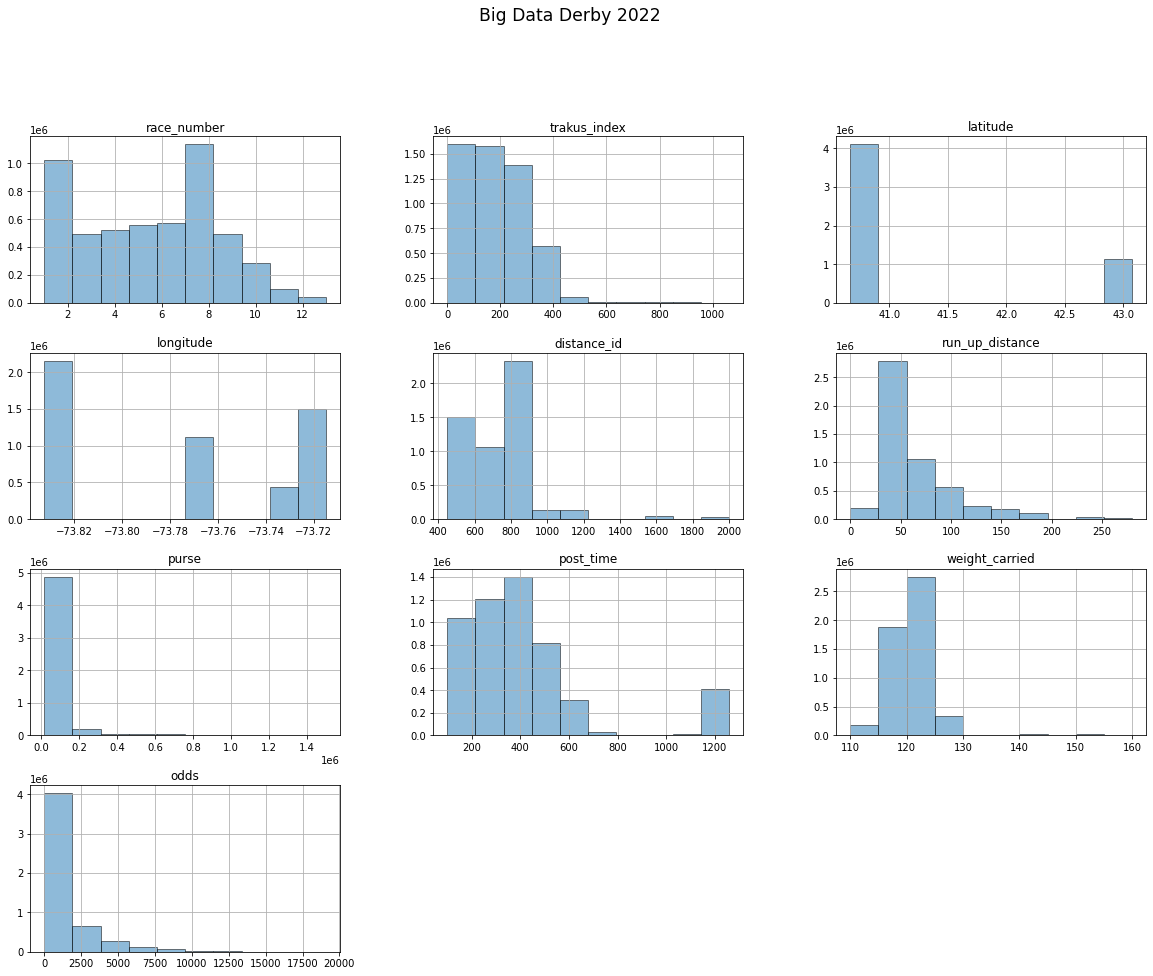

In [9]:
## Here I used a basic histogram function to plot all the numerical variables in the dataset.

df.hist(alpha=.5, rwidth=1, ec='black', figsize=(20,15));
plt.suptitle('Big Data Derby 2022', x=0.5, y=1, fontsize='xx-large');
plt.ticklabel_format(style='plain', useOffset=True)

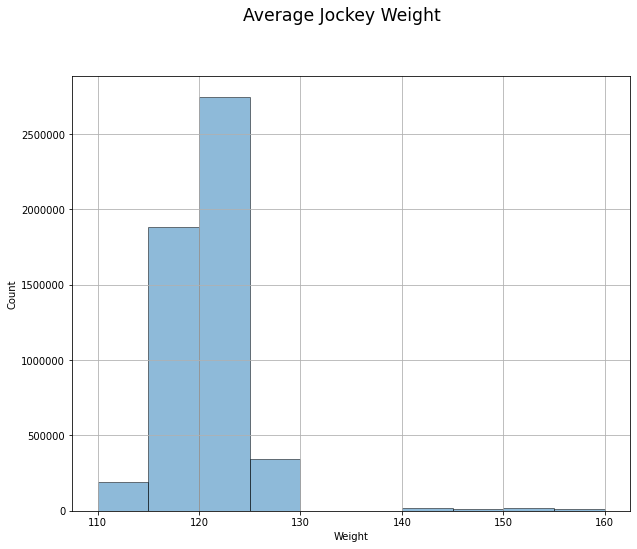

In [10]:
# Plotting histogram for average jockey weight

df.hist(column='weight_carried', alpha=.5, rwidth=1, ec='black', figsize=(10,8));
plt.suptitle('Average Jockey Weight', x=0.5, y=1, fontsize='xx-large');
plt.ticklabel_format(style='plain')
plt.xlabel('Weight');
plt.ylabel('Count');
plt.title("");

Looks like there may be some outliers in this data.

Lets remove those so our result scan be stastically more significant.

In [11]:
# Dropping outliers 

df.drop(df[df.weight_carried >= 140].index, inplace=True)

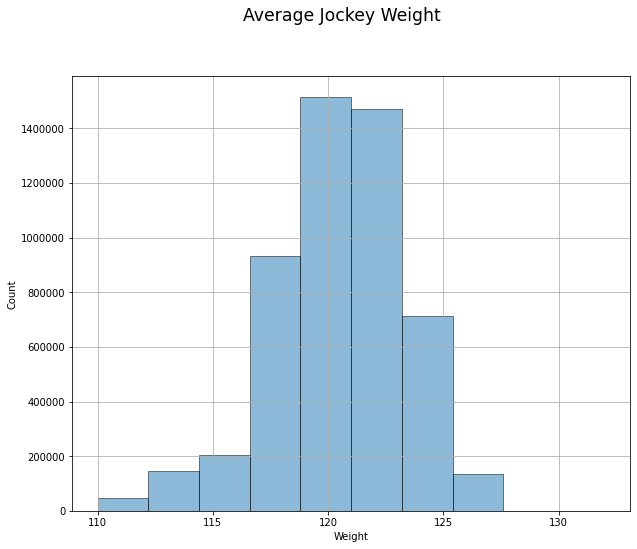

In [12]:
# Plottin histogram after removing outliers

df.hist(column='weight_carried', alpha=.5, rwidth=1, ec='black', figsize=(10,8));
plt.suptitle('Average Jockey Weight', x=0.5, y=1, fontsize='xx-large');
plt.ticklabel_format(style='plain')
plt.xlabel('Weight');
plt.ylabel('Count');
plt.title("");

After removing the outliers we see the histogram now is a little more normally distributed.


<a id='eqa'></a>

# Equine Safety Analysis
***

In this section we will analyze the data to see if we can find any information that will help owners keep their horses safer.

This will be diffult as the dataset, although very big; is very limited in the information it has.

It would of been better if we had data for variables such as heart rate, EKG's, movement, etc.

This data does include variables such as track distance, jockey weight, race type, course condition and track condition which may lead to some other insights though.

Let's see what we can find.

# WORK IN PROGRESS... #